<a href="https://www.kaggle.com/code/markusayt/src-models-notebookea554506b2?scriptVersionId=162606177" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
#Check for colab or kaggle
try:
    import google.colab
    colab=True
except:
    colab=False

import os
kaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

In [4]:
#check for internet on in kaggle if the client is run on kaggle
import socket,warnings
if kaggle:

    try:
        socket.setdefaulttimeout(1)
        socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
    except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")

In [5]:
#If using FastAI, this will need to be ran to give latest version
"""if colab:
    !pip install -Uqq fastbook
    import fastbook
    fastbook.setup_book()

elif kaggle:
    !pip install -Uqq fastai"""

'if colab:\n    !pip install -Uqq fastbook\n    import fastbook\n    fastbook.setup_book()\n\nelif kaggle:\n    !pip install -Uqq fastai'

In [6]:
# Opening from different sources to allow for use of local IDE as well as run in kaggle
# Kaggle and local version is linked through github

from pathlib import Path
if colab:
    from google.colab import drive
    drive.mount("/content/gdrive")
    DATA = Path('/content/gdrive/MyDrive/DAT255/')
    DATA.mkdir(exist_ok=True, parents=True)
    
elif kaggle:
    DATA = Path('/kaggle/input/turbine-data/Onsite-MetMast-SCADA-data-2017.xlsx')
    DATAScada = Path("/kaggle/input/turbine-data/Wind-Turbine-SCADA-signals-2017_0.xlsx")
    DATAFailures = Path("/kaggle/input/turbine-data/opendata-wind-failures-2017.xlsx")

else:
    DATA = "../../data/processed/Onsite-MetMast-SCADA-data-2017.xlsx"
    DATAScada = "../../data/processed/Wind-Turbine-SCADA-signals-2017_0.xlsx"
    DATAFailures = "../../data/processed/opendata-wind-failures-2017.xlsx"

In [7]:
# opening excel file for processed data from 2017
data = pd.read_excel(DATA, engine='openpyxl')

In [8]:
# opening excel file for Scada data from 2017
datascada = pd.read_excel(DATAScada, engine='openpyxl')

### Testing colum sorting with dataframes in pandas
testing how to open and organize data using columns on failure dataset. This dataset is smaller, but is still based on time, so its good to do some tests on this one before the big datasets

In [9]:
# opening excel file for failures of all turbines in 2017
datafailures = pd.read_excel(DATAFailures, engine="openpyxl")

In [10]:
# sort by turbine T07
T07Failures = datafailures[datafailures["Turbine_ID"] == "T07"]
T07Failures # printing to show example of how how it looks. datafailures is only a small file

,Turbine_ID,Component,Timestamp,Remarks
3,T07,GENERATOR_BEARING,2017-08-20T06:08:00+00:00,Generator bearings damaged
4,T07,GENERATOR,2017-08-21T14:47:00+00:00,Generator damaged
5,T07,HYDRAULIC_GROUP,2017-06-17T11:35:00+00:00,Oil leakage in Hub
6,T07,HYDRAULIC_GROUP,2017-10-19T10:11:00+00:00,Oil leakage in Hub


In [11]:
T07_scada_data = datascada[datascada["Turbine_ID"] == "T07"] # sorting data from T07 turbine

In [12]:
#combining the data with respect to datetime. This is the inner join of enviromental data and turbine data for a respective timestamp
merged_df = pd.merge(T07_scada_data, data, on="Timestamp", how="inner")


In [ ]:
# check title fields
for i in merged_df:
    print(i)

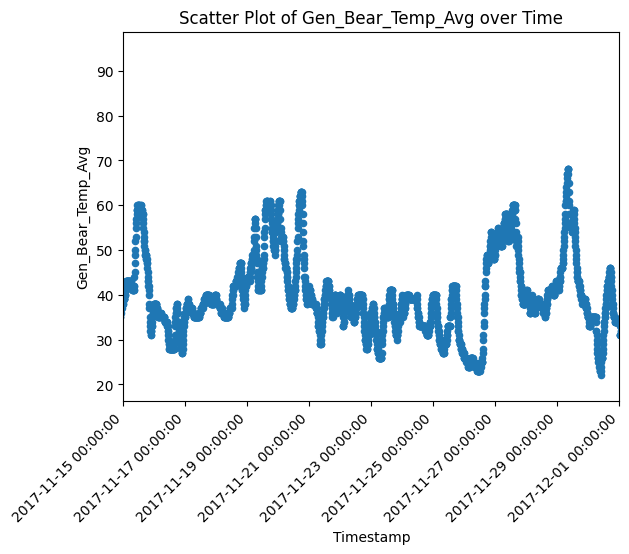

In [31]:
# plotting some data to look for outliers and anomalties in the data itself. Visualize the data
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#for i in merged_df:
merged_df['Timestamp'] = pd.to_datetime(merged_df['Timestamp'])

ax = merged_df.plot.scatter(x="Timestamp", y="Gen_Bear_Temp_Avg")

# Customize the format of the timestamp on the x-axis
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))

# Optionally, set the locator for more control over tick placement
#ax.xaxis.set_major_locator(mdates.DayLocator())  # You can adjust the locator based on your data frequency

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.xlim(pd.Timestamp('2017-11-15'), pd.Timestamp('2017-12-01'))

# Add labels and title
plt.xlabel('Timestamp')
plt.ylabel('Gen_Bear_Temp_Avg')
plt.title('Scatter Plot of Gen_Bear_Temp_Avg over Time')

# Show the plot
plt.show()